In [1]:
# Libraries and modules for the sentiment analysis
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import svm
import joblib
import pickle

import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kings\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Importing the dataset.
piggy_data = pd.read_csv('piggyvest.csv')

In [3]:
piggy_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,c182640a-6ebe-4df7-8844-c200cefa8502,Praise Yusufu,https://play-lh.googleusercontent.com/a-/ACNPE...,I'm very pleased with this app..I've been usin...,4,155,4.6.0,2022-08-24 00:35:02,NaN,NaN
1,2f37c59f-5bf2-4c9d-b577-3646242e5c4e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Result of my review on PiggyVest's mobile appl...,5,334,4.0.1,2020-03-29 21:56:27,NaN,NaN
2,5e9e7362-2150-4680-90d8-e49895b97abe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The beauty of an application or software is it...,5,277,4.0.1,2020-04-02 08:07:15,NaN,NaN
3,f1dafc5a-4bf9-4a15-8a9f-f29c65a7f2ec,Precious Sobamiwa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Awesome!!! Use this to save, its amazing... Th...",5,226,4.5.0,2020-11-03 01:37:33,NaN,NaN
4,614f37de-24f7-4041-84fc-3044fb7b5f85,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Each update increase the complexity of the app...,4,54,4.0.1,2020-01-02 10:48:51,NaN,NaN


In [4]:
piggy_data.shape

(21599, 10)

In [5]:
# This Function is to clean the dataset and remove the noise
def cleanData(data):
  data = re.sub(r'@[A-Za-z0-9_]+', '', data) # this will remove the @ mentions
  data = re.sub(r'#', '', data) # this will remove the # symbols
  data = re.sub(r'https?:\/\/\s+', '', data) # This will remove the hyperlink
  data = re.sub(r'\n+', '', data) # This will removes all mention of \n
  data = re.sub(r'_', '', data) # This will remove _
  data = re.sub(r'[0-9]', '', data) # This will remove numbers
  data = data.lower()
  data = data.split()
  data = [ps.stem(word) for word in data if not word in set(all_stopwords)]
  data = ' '.join(data)
  return data

In [6]:
piggy_data['review'] = piggy_data['content'].apply(cleanData)

In [7]:
piggy_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review
0,c182640a-6ebe-4df7-8844-c200cefa8502,Praise Yusufu,https://play-lh.googleusercontent.com/a-/ACNPE...,I'm very pleased with this app..I've been usin...,4,155,4.6.0,2022-08-24 00:35:02,NaN,NaN,i'm pleas app..i'v use sinc i'v never look bac...
1,2f37c59f-5bf2-4c9d-b577-3646242e5c4e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Result of my review on PiggyVest's mobile appl...,5,334,4.0.1,2020-03-29 21:56:27,NaN,NaN,result review piggyvest' mobil application. si...
2,5e9e7362-2150-4680-90d8-e49895b97abe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The beauty of an application or software is it...,5,277,4.0.1,2020-04-02 08:07:15,NaN,NaN,beauti applic softwar abil solv intend purpos ...
3,f1dafc5a-4bf9-4a15-8a9f-f29c65a7f2ec,Precious Sobamiwa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Awesome!!! Use this to save, its amazing... Th...",5,226,4.5.0,2020-11-03 01:37:33,NaN,NaN,"awesome!!! use save, amazing... there' bank ch..."
4,614f37de-24f7-4041-84fc-3044fb7b5f85,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Each update increase the complexity of the app...,4,54,4.0.1,2020-01-02 10:48:51,NaN,NaN,updat increas complex application. becom diffi...


In [8]:
# Create a function to get the subjectivity. This tells the subjectivity of the users
def reviewSubjectivity(data):
  return TextBlob(data).sentiment.subjectivity

In [9]:
# New column for the subjectivity
piggy_data['subjectivity'] = piggy_data['review'].apply(reviewSubjectivity)

In [10]:
# Create a function that tells the polarity of the review
def reviewPolarity(data):
  return TextBlob(data).sentiment.polarity

In [11]:
# New column for the polarity
piggy_data['polarity'] = piggy_data['review'].apply(reviewPolarity)

In [12]:
piggy_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,subjectivity,polarity
0,c182640a-6ebe-4df7-8844-c200cefa8502,Praise Yusufu,https://play-lh.googleusercontent.com/a-/ACNPE...,I'm very pleased with this app..I've been usin...,4,155,4.6.0,2022-08-24 00:35:02,NaN,NaN,i'm pleas app..i'v use sinc i'v never look bac...,0.350000,0.012500
1,2f37c59f-5bf2-4c9d-b577-3646242e5c4e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Result of my review on PiggyVest's mobile appl...,5,334,4.0.1,2020-03-29 21:56:27,NaN,NaN,result review piggyvest' mobil application. si...,0.308333,0.262500
2,5e9e7362-2150-4680-90d8-e49895b97abe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The beauty of an application or software is it...,5,277,4.0.1,2020-04-02 08:07:15,NaN,NaN,beauti applic softwar abil solv intend purpos ...,0.433333,0.533333
3,f1dafc5a-4bf9-4a15-8a9f-f29c65a7f2ec,Precious Sobamiwa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Awesome!!! Use this to save, its amazing... Th...",5,226,4.5.0,2020-11-03 01:37:33,NaN,NaN,"awesome!!! use save, amazing... there' bank ch...",0.650909,0.647273
4,614f37de-24f7-4041-84fc-3044fb7b5f85,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Each update increase the complexity of the app...,4,54,4.0.1,2020-01-02 10:48:51,NaN,NaN,updat increas complex application. becom diffi...,0.550000,-0.266667


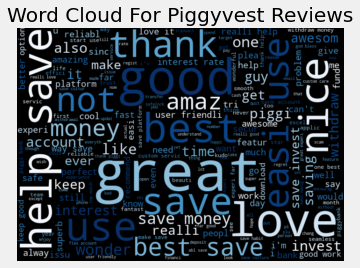

In [16]:
# Create a word cloud for the tweet which will visualize the frequently used words
alltexts = ' '.join([word for word in piggy_data['review']])
wordcloud = WordCloud(width = 700, height = 500, random_state = 21, max_font_size = 120, colormap='Blues', stopwords = ['piggyvest', 'piggy', 'vest', 'app', 'https', 'http']).generate(alltexts)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud For Piggyvest Reviews')
plt.show()

In [17]:
# Create a function to compute the negative, neutral and politive analysis
def polarityAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [18]:
# Create new column that checks the analysis of the polarity
piggy_data['Analysis'] = piggy_data['polarity'].apply(polarityAnalysis)

In [19]:
piggy_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,review,subjectivity,polarity,Analysis
0,c182640a-6ebe-4df7-8844-c200cefa8502,Praise Yusufu,https://play-lh.googleusercontent.com/a-/ACNPE...,I'm very pleased with this app..I've been usin...,4,155,4.6.0,2022-08-24 00:35:02,NaN,NaN,i'm pleas app..i'v use sinc i'v never look bac...,0.350000,0.012500,Positive
1,2f37c59f-5bf2-4c9d-b577-3646242e5c4e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Result of my review on PiggyVest's mobile appl...,5,334,4.0.1,2020-03-29 21:56:27,NaN,NaN,result review piggyvest' mobil application. si...,0.308333,0.262500,Positive
2,5e9e7362-2150-4680-90d8-e49895b97abe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The beauty of an application or software is it...,5,277,4.0.1,2020-04-02 08:07:15,NaN,NaN,beauti applic softwar abil solv intend purpos ...,0.433333,0.533333,Positive
3,f1dafc5a-4bf9-4a15-8a9f-f29c65a7f2ec,Precious Sobamiwa,https://play-lh.googleusercontent.com/a-/ACNPE...,"Awesome!!! Use this to save, its amazing... Th...",5,226,4.5.0,2020-11-03 01:37:33,NaN,NaN,"awesome!!! use save, amazing... there' bank ch...",0.650909,0.647273,Positive
4,614f37de-24f7-4041-84fc-3044fb7b5f85,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Each update increase the complexity of the app...,4,54,4.0.1,2020-01-02 10:48:51,NaN,NaN,updat increas complex application. becom diffi...,0.550000,-0.266667,Negative


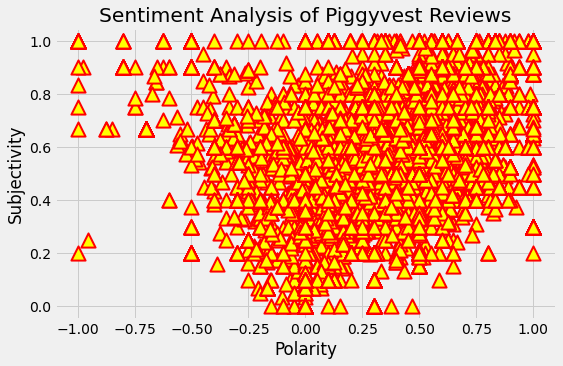

In [20]:
# Plot a scatter plot of the polarity and subjectivity of the tweets
plt.figure(figsize=(8,5))
plt.scatter(piggy_data['polarity'], piggy_data['subjectivity'], c ="yellow",
            linewidths = 2,
            marker ="^",
            edgecolor ="red",
            s = 200)

plt.title('Sentiment Analysis of Piggyvest Reviews')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

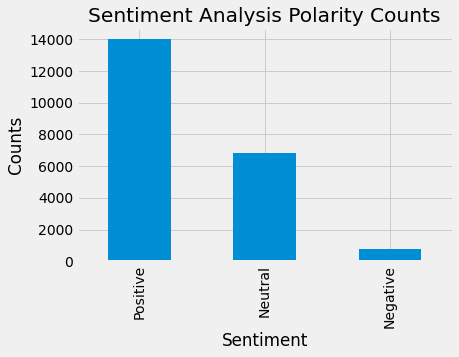

In [21]:
piggy_data['Analysis'].value_counts()

plt.title('Sentiment Analysis Polarity Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
piggy_data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
# Create a function to compute the label column. Every polarity greater than zero is positive while rating less than or equal to zero is negative
def ratingPolarity(rating):
  if rating > 0:
    return 1
  else:
    return 0

In [23]:
piggy_data['binaryrating'] = piggy_data['polarity'].apply(ratingPolarity)

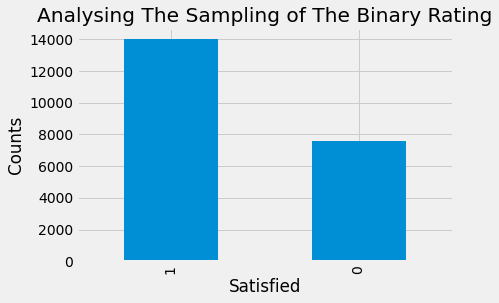

In [24]:
piggy_data['binaryrating'].value_counts()

plt.title('Analysing The Sampling of The Binary Rating')
plt.xlabel('Satisfied')
plt.ylabel('Counts')
piggy_data['binaryrating'].value_counts().plot(kind = 'bar')
plt.show()

In [25]:
# Drop all columns that are not needed for the analysis or decision making
piggy_data.drop(["repliedAt", "replyContent", "reviewCreatedVersion", "userImage" ], axis = 1, inplace=True)

In [26]:
piggy_data.head()

,reviewId,userName,content,score,thumbsUpCount,at,review,subjectivity,polarity,Analysis,binaryrating
0,c182640a-6ebe-4df7-8844-c200cefa8502,Praise Yusufu,I'm very pleased with this app..I've been usin...,4,155,2022-08-24 00:35:02,i'm pleas app..i'v use sinc i'v never look bac...,0.350000,0.012500,Positive,1
1,2f37c59f-5bf2-4c9d-b577-3646242e5c4e,A Google user,Result of my review on PiggyVest's mobile appl...,5,334,2020-03-29 21:56:27,result review piggyvest' mobil application. si...,0.308333,0.262500,Positive,1
2,5e9e7362-2150-4680-90d8-e49895b97abe,A Google user,The beauty of an application or software is it...,5,277,2020-04-02 08:07:15,beauti applic softwar abil solv intend purpos ...,0.433333,0.533333,Positive,1
3,f1dafc5a-4bf9-4a15-8a9f-f29c65a7f2ec,Precious Sobamiwa,"Awesome!!! Use this to save, its amazing... Th...",5,226,2020-11-03 01:37:33,"awesome!!! use save, amazing... there' bank ch...",0.650909,0.647273,Positive,1
4,614f37de-24f7-4041-84fc-3044fb7b5f85,A Google user,Each update increase the complexity of the app...,4,54,2020-01-02 10:48:51,updat increas complex application. becom diffi...,0.550000,-0.266667,Negative,0


In [27]:
cv = CountVectorizer(max_features = 1420)

In [28]:
X = cv.fit_transform(piggy_data['review']).toarray()
y = piggy_data['binaryrating']

In [29]:
# Saving BoW dictionary for later use in prediction
import pickle
bow_path = 'BagOfWordSentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [30]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [31]:
classifier = GaussianNB()

## Using Naive Bayes For Classification

In [32]:
classifier.fit(X_train, y_train)

GaussianNB()

In [33]:
# Run the test dataset
y_pred = classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy_score(y_test, y_pred)

[[1380  166]
 [1687 1087]]


0.5710648148148149

In [34]:
clrp = classification_report(y_test, y_pred)
print(clrp)

              precision    recall  f1-score   support

           0       0.45      0.89      0.60      1546
           1       0.87      0.39      0.54      2774

    accuracy                           0.57      4320
   macro avg       0.66      0.64      0.57      4320
weighted avg       0.72      0.57      0.56      4320



## Using Support Vector Classifier

In [37]:
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train, y_train)

In [53]:
y_pred = svc.predict(X_test)

In [54]:
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [38]:



conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy_score(y_test, y_pred)

[[1482   64]
 [  55 2719]]


0.9724537037037037

## Hiperparameter Tuning For Naive Bayes

In [39]:
#from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RepeatedStratifiedKFold

#Using roc_auc for scoring
param_grid = {
    "var_smoothing": np.logspace(0, -9, num = 100)
}

grid_search = GridSearchCV(classifier, param_grid, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc')

In [40]:
grid_scores = grid_search.cv_results_

In [41]:
pd.DataFrame(grid_scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,12.361948,2.982150,0.594011,0.307385,1.0,{'var_smoothing': 1.0},0.895731,0.867815,0.875436,0.878578,0.890985,0.887384,0.882206,0.879664,0.894721,0.870880,0.882340,0.009187,32
1,5.541646,1.144893,0.495086,0.090049,0.811131,{'var_smoothing': 0.8111308307896871},0.900810,0.874104,0.880087,0.885050,0.896750,0.894019,0.888977,0.885546,0.902185,0.877973,0.888550,0.009203,30
2,4.458699,1.018883,0.619698,0.215771,0.657933,{'var_smoothing': 0.657933224657568},0.906258,0.880042,0.885014,0.891212,0.902011,0.900920,0.895512,0.891648,0.909177,0.884658,0.894645,0.009311,28
3,4.932815,0.670740,0.392817,0.135501,0.53367,{'var_smoothing': 0.533669923120631},0.911858,0.885012,0.889728,0.897195,0.906922,0.907678,0.902452,0.896822,0.915736,0.891236,0.900464,0.009612,26
4,5.410079,1.096556,0.566255,0.269074,0.432876,{'var_smoothing': 0.43287612810830584},0.917455,0.890736,0.894196,0.902588,0.912230,0.913174,0.908331,0.903233,0.922011,0.897418,0.906137,0.009738,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.169444,0.309068,0.707268,0.244167,0.0,{'var_smoothing': 2.310129700083158e-09},0.864210,0.848929,0.842765,0.848756,0.859192,0.849175,0.850591,0.849542,0.860942,0.858088,0.853219,0.006513,49
96,4.696786,0.613848,0.679639,0.267196,0.0,{'var_smoothing': 1.873817422860387e-09},0.866440,0.850052,0.844808,0.850095,0.860001,0.848450,0.850164,0.849521,0.862704,0.858583,0.854082,0.006844,47
97,4.917396,0.645418,0.666242,0.240078,0.0,{'var_smoothing': 1.519911082952933e-09},0.867044,0.852001,0.847079,0.849968,0.860398,0.848620,0.849482,0.852002,0.863485,0.858606,0.854868,0.006605,46
98,4.544923,0.403712,0.653457,0.170640,0.0,{'var_smoothing': 1.2328467394420635e-09},0.867356,0.852050,0.847779,0.850638,0.860624,0.848455,0.848690,0.852610,0.865389,0.858996,0.855259,0.006898,44


In [42]:
grid_search.best_params_

{'var_smoothing': 0.02848035868435802}

In [45]:
y_pred1 = grid_search.predict(X_test)

In [46]:
y_pred1

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [47]:
#Using the accuracy for the scoring in naive bayes
param_grid = {
    "var_smoothing": np.logspace(0, -9, num = 100)
}

grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [48]:
grid_scores1 = grid_search.cv_results_

In [49]:
scores = pd.DataFrame(grid_scores1)

In [50]:
grid_search.best_params_

{'var_smoothing': 0.006579332246575682}

In [51]:
scores = scores[scores['param_var_smoothing'] == 0.006579332246575682]

In [52]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
24,4.425215,0.275995,0.52488,0.098658,0.006579,{'var_smoothing': 0.006579332246575682},0.846065,0.839699,0.836227,0.837963,0.851852,0.840278,0.859375,0.84838,0.862847,0.844818,0.84675,0.00855,1


In [55]:
print(f'Prediction from Support Vector Classifier: {y_pred}')
print(f'Prediction for best performing Naive Bayes Classifier: {y_pred1}')

Prediction from Support Vector Classifier: [1 0 1 ... 0 1 1]
Prediction for best performing Naive Bayes Classifier: [1 0 1 ... 0 1 1]


**Best parameter gave a mean accuracy score of 0.85 which is 85%**

In [56]:
# This code will export Naive Bayes Classifier for later use in prediction
joblib.dump(grid_search, 'Classifier_Sentiment GNB Model') 
joblib.dump(svc, 'Classifier_Sentiment SVC Model')

['Classifier_Sentiment SVC Model']